In [50]:
import numpy as np
import matplotlib.pyplot as plt
from src.utils.dft import dft

z = np.linspace(-2, 4, 600)
centers = [0, 2]

$f = 1/(1+exp^{-z})$

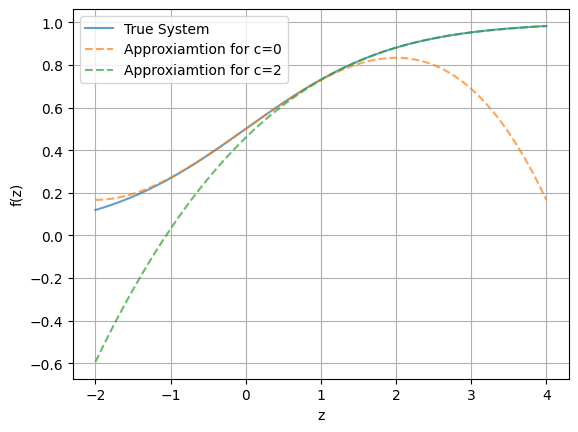

In [34]:
def get_derivatives(z):
    zexp = np.exp(-z)
    denom = (1 + zexp)

    d0 = 1 / denom
    d1 = zexp / (denom ** 2)
    d2 = 2 * (zexp ** 2) / (denom ** 3) - zexp / (denom ** 2)
    d3 = zexp / (denom ** 2) - 6 * (zexp ** 2) / (denom ** 3) + 6 * (zexp ** 3) / (denom ** 4)

    return d0, d1, d2, d3


f, _, _, _ = get_derivatives(z)

fh = []

for c in centers:
    d0, d1, d2, d3 = get_derivatives(c)

    a0 = d0 - (d1 * c) + (d2 / 2 * c ** 2) - (d3 / 6 * c ** 3)
    a1 = d1 - (d2 * c) + (d3 / 2 * c ** 2)
    a2 = d2 / 2 - (d3 / 2 * c)
    a3 = d3 / 6

    fhc = a0 + a1 * z + a2 * z ** 2 + a3 * z ** 3
    fh.append(fhc)

plt.close()
plt.figure()

plt.xlabel('z')
plt.ylabel('f(z)')

plt.plot(z, f, label=f'True System', alpha=0.7)
plt.plot(z, fh[0], '--', label=f'Approxiamtion for c={centers[0]}', alpha=0.7)
plt.plot(z, fh[1], '--', label=f'Approxiamtion for c={centers[1]}', alpha=0.7)

plt.legend()
plt.grid()
plt.show()

$f=A \cos(\theta_0 n) + A_0$

In [51]:
A0 = [0, 2]
A = [1, 3]
th = np.pi / 15
z = np.linspace(0, 300, 30000)

A=1, A0=0


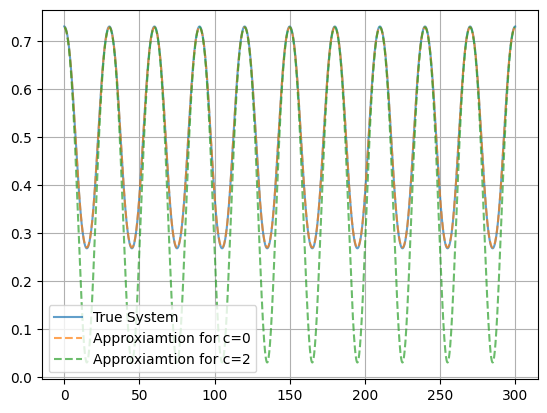

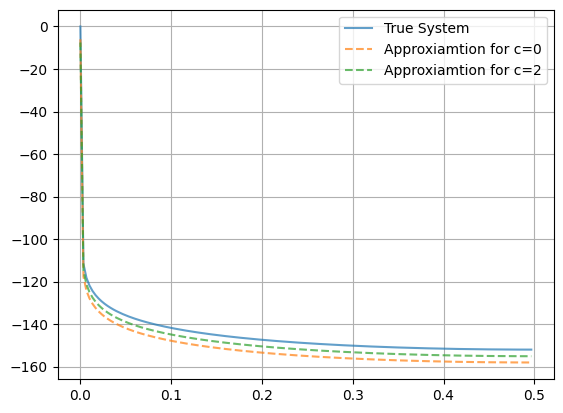

A=3, A0=0


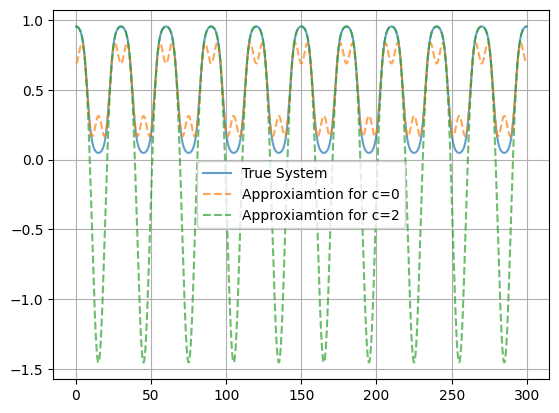

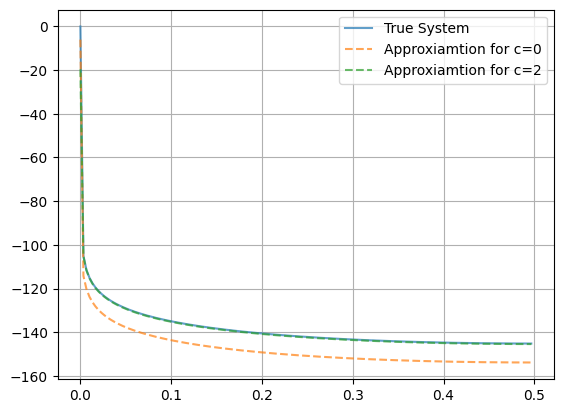

A=1, A0=2


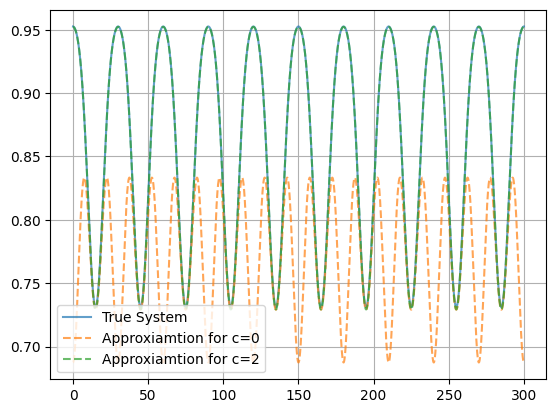

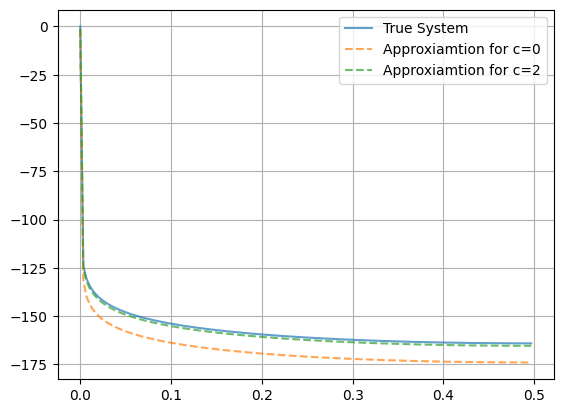

A=3, A0=2


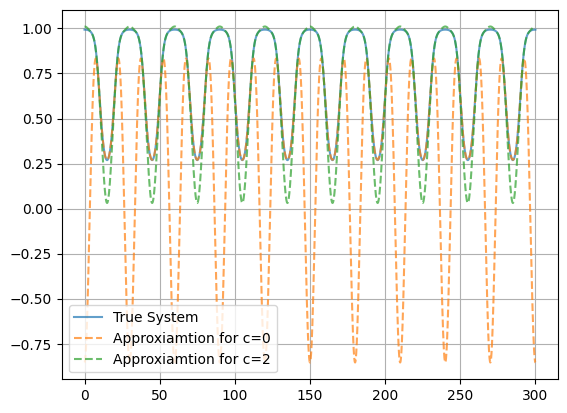

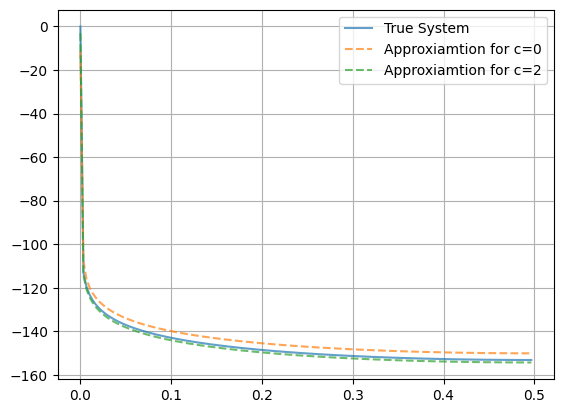

In [61]:
def plot_graph(z, A, A0, th, centers):
    print(f'A={A}, A0={A0}')

    x = A * np.cos(th * z) + A0

    f, _, _, _ = get_derivatives(x)
    sf,freq = dft(f, 1.0, n_dft=300)
    fh = []
    sfh = []
    freqh = []
    for c in centers:
        d0, d1, d2, d3 = get_derivatives(c)

        a0 = d0 - (d1 * c) + (d2 / 2 * c ** 2) - (d3 / 6 * c ** 3)
        a1 = d1 - (d2 * c) + (d3 / 2 * c ** 2)
        a2 = d2 / 2 - (d3 / 2 * c)
        a3 = d3 / 6

        fhc = a0 + a1 * x + a2 * x ** 2 + a3 * x ** 3
        fh.append(fhc)

        sfhc, freqhc = dft(fhc, 1.0, n_dft=300)
        sfh.append(sfhc)
        freqh.append(freqhc)

    plt.figure()

    plt.plot(z, f, label=f'True System', alpha=0.7)

    for i in range(len(centers)):
        plt.plot(z, fh[i], '--', label=f'Approxiamtion for c={centers[i]}', alpha=0.7)

    plt.legend()
    plt.grid()
    plt.show()

    plt.figure()
    plt.plot(freq, 20*np.log10(sf/np.max(sf)), label=f'True System', alpha=0.7)
    for i in range(len(centers)):
        plt.plot(freqh[i], 20*np.log10(sfh[i]), '--', label=f'Approxiamtion for c={centers[i]}', alpha=0.7)

    plt.legend()
    plt.grid()
    plt.show()

for a0 in A0:
    for a in A:
        plot_graph(z, a, a0, th, centers)